In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

# Data Import and Cleanup

In [67]:
time_tracking = pd.read_csv('time_tracking.csv')

# clean up
time_tracking = time_tracking[time_tracking['state'].str.lower() == 'stopped']
time_tracking['datetime'] = time_tracking['datetime'].astype('datetime64')
time_tracking = time_tracking[['activity','datetime', 'hours', 'client', 'project']]

time_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8163 entries, 1 to 16325
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   activity  8163 non-null   object        
 1   datetime  8163 non-null   datetime64[ns]
 2   hours     8163 non-null   float64       
 3   client    2107 non-null   object        
 4   project   2107 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 382.6+ KB


In [68]:
time_tracking.head()

,activity,datetime,hours,client,project
1,Client Production,2016-11-08 14:51:00,1.58,NaN,NaN
3,Client Production,2016-11-08 16:40:00,1.53,NaN,NaN
5,Client Production,2016-11-09 13:18:00,1.50,NaN,NaN
7,Client Production,2016-11-09 15:18:00,1.55,NaN,NaN
9,Client Production,2016-11-11 13:06:00,1.50,NaN,NaN


# Exploratory Data Analysis

In [69]:
total_hours = time_tracking['hours'].sum()
print(total_hours)

8230.89


In [70]:
activity_total_hours = time_tracking.groupby('activity').hours.sum().reset_index(name='total_hours')
activity_total_hours = activity_total_hours.sort_values(by='total_hours', ascending=False)
activity_total_hours.head(20)

,activity,total_hours
3,Client Production,4146.73
8,Meridian Quake,1555.38
12,Spec,1049.80
1,Admin,714.59
11,Sound Design,230.36
6,Engineering,224.02
4,Edu Data Science,141.85
9,Practicing,120.05
10,Programming Portfolio,17.95
0,AV,13.16


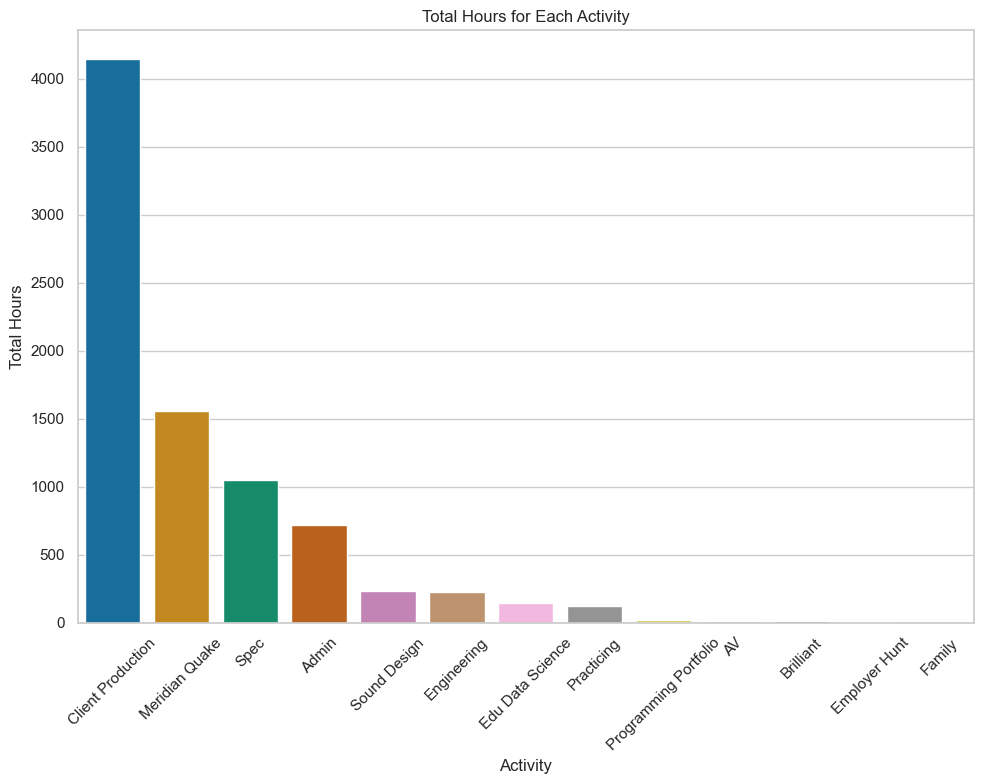

In [71]:
# create figure
plt.figure(figsize=(10,8))
ax = plt.subplot()

# Set the style of seaborn
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette
palette = sns.color_palette("colorblind", n_colors=len(activity_total_hours))

# Create the bar plot with the chosen palette
sns.barplot(x='activity', y='total_hours', data=activity_total_hours, palette=palette)
plt.xticks(rotation=45)
plt.xlabel('Activity')
plt.ylabel('Total Hours')
plt.title('Total Hours for Each Activity')
plt.tight_layout()  # Ensures that labels and titles fit within the plot area
plt.show()